In [21]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('datasets\clean_data\mining_detailed_supply.csv')
data.head(20)

,Input,Commodity,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Production of Energy,Black coal,"7,287","7,535","8,055","8,141","8,632","8,651","9,009","9,759","9,244","9,885","10,902","11,807","12,288","12,157","12,162","12,370"
1,Production of Energy,Natural gas,"1,462","1,463","1,638","1,725","1,910","1,977","2,083","2,190","2,398","2,273","2,605","2,691","2,777","3,500","4,233","4,824"
2,Production of Energy,LNG,426,431,576,654,780,744,838,987,"1,102","1,041","1,298","1,284","1,383","2,016","2,855","3,376"
3,Production of Energy,Crude oil and feedstocks,"1,233","1,032",941,860,"1,036",963,"1,093","1,069","1,015",935,838,780,726,701,621,589
4,Production of Energy,LPG,126,125,127,130,150,132,134,136,117,118,114,116,99,99,83,82
5,Production of Energy,Electricity,11,12,9,9,12,13,14,17,18,18,10,11,11,22,22,24
6,Production of Energy,Residuals,103,106,117,130,151,151,163,159,164,164,180,191,197,237,309,346
7,Production of Energy,Electricity,7,7,9,9,10,12,11,12,12,12,25,28,31,37,36,37
8,Production of Energy,Uranium,"4,311","4,497","5,154","4,710","4,480","4,757","4,854","3,319","3,355","3,602","4,209","2,795","3,053","3,603","3,429","3,127"
9,Production of Energy,Residuals,2,3,2,2,2,-,9,7,7,7,5,3,-,2,9,6


In [23]:
data = data.iloc[0:10]

In [24]:
data = data.replace('-', '0')

In [25]:
data = data.drop(columns=['Input'])

In [26]:
data

,Commodity,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Black coal,"7,287","7,535","8,055","8,141","8,632","8,651","9,009","9,759","9,244","9,885","10,902","11,807","12,288","12,157","12,162","12,370"
1,Natural gas,"1,462","1,463","1,638","1,725","1,910","1,977","2,083","2,190","2,398","2,273","2,605","2,691","2,777","3,500","4,233","4,824"
2,LNG,426,431,576,654,780,744,838,987,"1,102","1,041","1,298","1,284","1,383","2,016","2,855","3,376"
3,Crude oil and feedstocks,"1,233","1,032",941,860,"1,036",963,"1,093","1,069","1,015",935,838,780,726,701,621,589
4,LPG,126,125,127,130,150,132,134,136,117,118,114,116,99,99,83,82
5,Electricity,11,12,9,9,12,13,14,17,18,18,10,11,11,22,22,24
6,Residuals,103,106,117,130,151,151,163,159,164,164,180,191,197,237,309,346
7,Electricity,7,7,9,9,10,12,11,12,12,12,25,28,31,37,36,37
8,Uranium,"4,311","4,497","5,154","4,710","4,480","4,757","4,854","3,319","3,355","3,602","4,209","2,795","3,053","3,603","3,429","3,127"
9,Residuals,2,3,2,2,2,0,9,7,7,7,5,3,0,2,9,6


In [27]:
X = data[["2002","2003","2004","2005","2006","2017","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
y = data["Commodity"].values.reshape(-1, 1)
print(X.shape, y.shape)


(10, 16) (10, 1)


In [29]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler

NameError: name 'X_scaler' is not defined

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: could not convert string to float: 'Black coal'

In [31]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

NameError: name 'y_scaler' is not defined

KeyError: "Employed full-time ('000)"

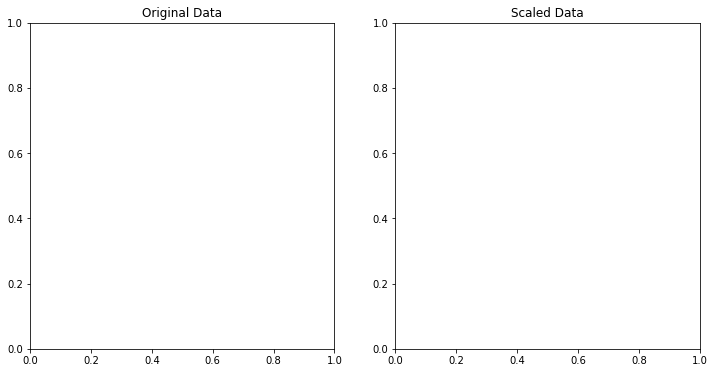

In [32]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Employed full-time ('000)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Employed full-time ('000)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [33]:
X = pd.get_dummies(data[["Employed full-time ('000)"]])
y = data["Date"].values.reshape(-1, 1)
X.head()

KeyError: "None of [Index(['Employed full-time ('000)'], dtype='object')] are in the [columns]"

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

ValueError: could not convert string to float: 'Black coal'

In [36]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

NameError: name 'y_train_scaled' is not defined

In [37]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.